# Downloading

In [1]:
using Downloads
using SHA

mkpath("tmp")

if !isfile("tmp/adult.data")
    Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", "tmp/adult.data")
end

open("tmp/adult.data") do f
    @assert(sha1(f) == [0xee, 0x86, 0xbb, 0xe5, 0x56,
                        0x57, 0x8f, 0x70, 0x9a, 0xe0,
                        0xfd, 0x00, 0x2a, 0xc5, 0x8a,
                        0xc9, 0x37, 0x26, 0x48, 0x2f])
end

if !isfile("tmp/adult.names")
    Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names", "tmp/adult.names")
end

# Loading

In [2]:
using CSV
using DataFrames

ENV["COLUMNS"] = "1000"
ENV["LINES"] = "20"

col_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = CSV.read("tmp/adult.data", DataFrame, header=col_names, missingstring="?", delim=", ")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,Int64,InlineS…?,Int64,InlineS…,Int64,InlineS…,InlineS…?,InlineS…,InlineS…,InlineS…,Int64,Int64,Int64,InlineS…?,InlineS…
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [3]:
df2 = select(df, Not(:fnlwgt))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,Int64,InlineS…?,InlineS…,Int64,InlineS…,InlineS…?,InlineS…,InlineS…,InlineS…,Int64,Int64,Int64,InlineS…?,InlineS…
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [4]:
describe(df2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,age,38.5816,17,37.0,90,0,Int64
2,workclass,,Federal-gov,,Without-pay,1836,"Union{Missing, InlineString31}"
3,education,,10th,,Some-college,0,InlineString15
4,education-num,10.0807,1,10.0,16,0,Int64
5,marital-status,,Divorced,,Widowed,0,InlineString31
6,occupation,,Adm-clerical,,Transport-moving,1843,"Union{Missing, InlineString31}"
7,relationship,,Husband,,Wife,0,InlineString15
8,race,,Amer-Indian-Eskimo,,White,0,InlineString31
9,sex,,Female,,Male,0,InlineString7


In [5]:
const categorical = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
const continuous = ["age", "education-num", "captital-gain", "capital-loss", "hours-per-week"]

5-element Vector{String}:
 "age"
 "education-num"
 "captital-gain"
 "capital-loss"
 "hours-per-week"

In [11]:
using FreqTables
using Plots

In [7]:
plots = []
for name in categorical
    ft = freqtable(df2, name)
    println(ft)
    push!(plots, bar(ft, xticks=(1:length(ft), names(ft)[1]), xrotation=90,
                     label=name, xtickfontsize=5))
end

9-element Named Vector{Int64}
workclass          │ 
───────────────────┼──────
"Federal-gov"      │   960
"Local-gov"        │  2093
"Never-worked"     │     7
"Private"          │ 22696
"Self-emp-inc"     │  1116
"Self-emp-not-inc" │  2541
"State-gov"        │  1298
"Without-pay"      │    14
missing            │  1836
16-element Named Vector{Int64}
education      │ 
───────────────┼──────
"10th"         │   933
"11th"         │  1175
"12th"         │   433
"1st-4th"      │   168
"5th-6th"      │   333
"7th-8th"      │   646
"9th"          │   514
"Assoc-acdm"   │  1067
"Assoc-voc"    │  1382
"Bachelors"    │  5355
"Doctorate"    │   413
"HS-grad"      │ 10501
"Masters"      │  1723
"Preschool"    │    51
"Prof-school"  │   576
"Some-college" │  7291
7-element Named Vector{Int64}
marital-status          │ 
────────────────────────┼──────
"Divorced"              │  4443
"Married-AF-spouse"     │    23
"Married-civ-spouse"    │ 14976
"Married-spouse-absent" │   418
"Never-married"      

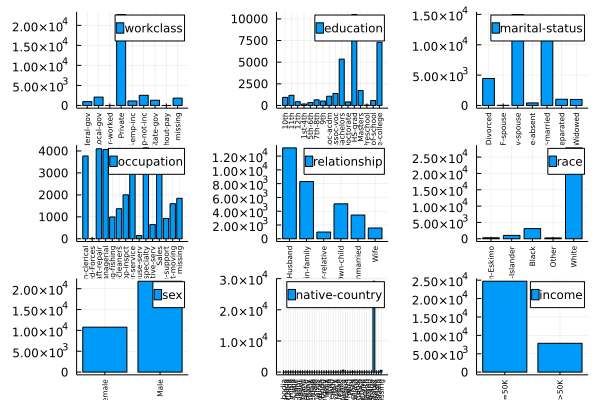

In [8]:
plot(plots...)

In [9]:
df3 = transform(df2, Symbol("native-country") => ByRow(x->ismissing(x) ? missing : (x == "United-States" ? "United-States" : "non-United-States")) => Symbol("native-country"))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,Int64,InlineS…?,InlineS…,Int64,InlineS…,InlineS…?,InlineS…,InlineS…,InlineS…,Int64,Int64,Int64,String?,InlineS…
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non-United-States,<=50K
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,non-United-States,<=50K
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [10]:
ft = freqtable(df3, "marital-status", "relationship")
DataFrame([names(ft)[1] ft], ["marital-status"; names(ft)[2]])

,marital-status,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
,Any,Any,Any,Any,Any,Any,Any
1,Divorced,0,2404,110,328,1601,0
2,Married-AF-spouse,9,0,1,1,0,12
3,Married-civ-spouse,13184,17,124,95,0,1556
4,Married-spouse-absent,0,211,32,45,130,0
5,Never-married,0,4706,611,4485,881,0
6,Separated,0,420,55,99,451,0
7,Widowed,0,547,48,15,383,0
